Pixel location: 400 350
Cartesian Coordinate: 0.5 0.3125
-0.325
-0.31318430050631607
-0.2724629319229143
-0.22750267058138662
-0.18546600923074721
-0.1516534090894027
-0.11925527027112344
-0.10436287894204524
-0.096336658447285
-0.0961519945949475
-0.10262325515881447
-0.11399978831150281
-0.12839211487454566
-0.1439894845705293
-0.1592084281736651
-0.17031405059774643
-0.18290917275828386
-0.19344084929019112
-0.20051719763749948
-0.19953134410772574
-0.2021379338583113
-0.19541610108767915
-0.1935152859705052
-0.1881032317640673
-0.18142682105641528
-0.1747182882161695
-0.1687931232519974
-0.1641951179813456
-0.1612286428751977
-0.1599761040176687
-0.16032583052559812
-0.1620132659262865
-0.16467135202533598
-0.16788410605875573
-0.1712374809692797
-0.1743626117585961
-0.17696802473273693
-0.17885903307994977
-0.1799441437287581
-0.18022968953756252
-0.17980496121273154
-0.1788207810954936
-0.177464722828015
-0.1759360681262251
-0.17442317056010867
-0.17308525544443407
-0.17203992397

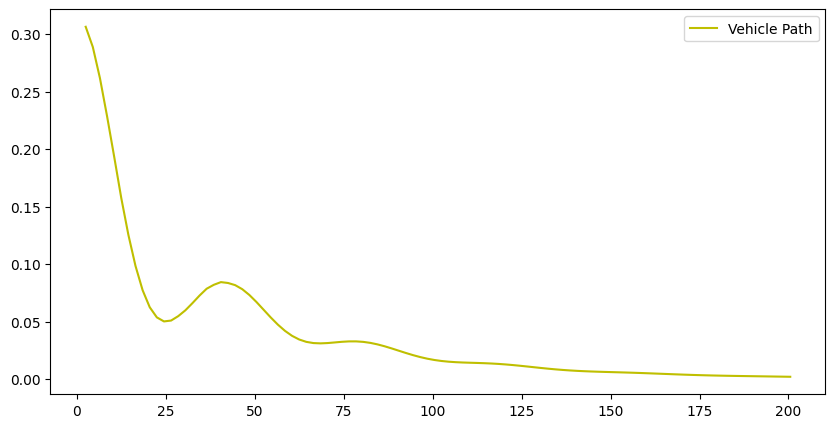

In [42]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt


class Vehicle(object):

    #intialial position of vehicle
    def __init__(self, x=0.0, y=0.0, angle= 0.0, length=50.0):
        self.difference_distance = 0.0
        self.difference_rotation = 0.0
        self.difference_drift = 0.0
        self.length = length

        #setting coordinates of vehicle
    def set(self, x, y, angle):

        self.x = x
        self.y = y
        self.angle = angle % (2.0 * np.pi)

    def set_difference(self, difference_rotation, difference_distance):
        self.difference_distance = difference_distance
        self.difference_rotation = difference_rotation

    def set_difference_drift(self, drift):
        self.difference_drift = drift

    #steering = angle of front wheel

    def drive(self, steer, distance, tolerance=0.001, max_allowed_steering =np.pi / 4.0):
         if steer > max_allowed_steering:
            steer = max_allowed_steering
         if steer < -max_allowed_steering:
            steer = -max_allowed_steering
         if distance < 0.0:
            distance = 0.0

         steer = random.gauss(steer, self.difference_rotation)
         distance = random.gauss(distance, self.difference_distance)

         steer += self.difference_drift

         rotate = np.tan(steer * distance / self.length)
         if abs(rotate) < tolerance:
            
            self.x += distance * np.cos(self.angle)
            self.y += distance * np.sin(self.angle)
            self.angle = (self.angle + rotate) % (2.0 * np.pi)
         else: 
            radius = distance / rotate
            cx = self.x - (np.sin(self.angle) * radius)
            cy = self.y + (np.cos(self.angle) * radius)
            self.angle = (self.angle + rotate) % (2.0 * np.pi)
            self.x = cx + (np.sin(self.angle) * radius)
            self.y = cy - (np.cos(self.angle) * radius)

    def __repr__(self):
        return '[x=%.5f y=%.5f orient=%.5f]' % (self.x, self.y, self.angle)

def convert_pixels_to_cartesian(pixel_x, pixel_y, origin_x, origin_y, x_scaling_factor, y_scaling_factor, total_image_height):
    x = (pixel_x - origin_x) * x_scaling_factor
    y = (total_image_height - pixel_y - origin_y) * y_scaling_factor
    return x, y

pixel_x = 400
pixel_y = 350
origin_x = 0
origin_y = 0
x_scaling_factor = 0.00125 # 1m/ 800 pixels
y_scaling_factor = 0.00125 # 0.75m/ 600 pixels
total_image_height = 600

x, y = convert_pixels_to_cartesian(pixel_x, pixel_y, origin_x, origin_y, x_scaling_factor, y_scaling_factor, total_image_height)

print("Pixel location:", pixel_x, pixel_y)
print("Cartesian Coordinate:", x, y)


vehicle = Vehicle()
vehicle.set(x, y, 0)
vehicle.set_difference_drift(10/180.*np.pi)  # add drift bias

def run(vehicle, wp, wd, wi, n=100, speed=2.0):
    x_trajectory = []
    y_trajectory = []
    
    prev_cte = vehicle.y
    sum_cte = 0
    for _ in range(n):
        sum_cte += vehicle.y
        dev = vehicle.y - prev_cte
        prev_cte = vehicle.y
        steer = -wp * vehicle.y - wd * dev - wi*sum_cte
        vehicle.drive(steer, speed)
        x_trajectory.append(vehicle.x)
        y_trajectory.append(vehicle.y)
        print(steer)
        
    return x_trajectory, y_trajectory


x_trajectory, y_trajectory = run(vehicle, 1.0, 3.0, 0.04)
n = len(x_trajectory)

fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax1.plot(x_trajectory, y_trajectory, 'y', label='Vehicle Path')
#ax1.plot(x_trajectory, np.zeros(n), 'b', label='Center Line')
plt.legend()



